<a href="https://colab.research.google.com/github/fontanads/bootcamp_dsa_2021/blob/main/Bruno_Fontana_da_Silva_M01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Orientações gerais

base de dados de [produção hospitalar](http://www2.datasus.gov.br/DATASUS/index.php?area=0202&id=11633&VObj=http://tabnet.datasus.gov.br/cgi/deftohtm.exe?sih/cnv/qi), seja número de internação, óbito, AIH ou taxa de mortalidade. 

- Como título do seu **Colab** coloque seu nome (Ex: Thiago_Gonçalves.ipynb)
- resumo dos pontos que julgar mais interessantes do seu projeto
- Crie um resumo das suas análises na parte superior do notebook
- Informe no resumo os dados que vc vai analisar (Ex: Finaceiros e Internações)
- submeta o link compartilhado do seu notebook [neste formulário](https://docs.google.com/forms/d/e/1FAIpQLSd1jemhvdo8sM6e-bgOryyZ2P3YuMO6E_mUQXabyBX_xhuZQQ/viewform?usp=sf_link) até dia 22/11 às 23h59.


# Provando o óbvio sobre a sazonalidade das doenças respiratórias

## Resumo:

- Primeiro tento analisar características importantes dos dados de procedimentos hospitalares. Sazonalidade no número de óbitos em cada ano é um ponto de destaque.

- Enumero a natureza das doenças que causam mais óbitos nos dados do SUS entre 2011 e 2018. Doenças respiratórias são a 4ª causa de morte mais frequente, correspondendo a aproximadamente 31% dos óbitos em cada ano.

- Identifico as faixa etárias predominantes e a sazonalidade das doenças respiratórias. Em resumo, a partir dos 30 anos de idade o número de óbitos cresce com o aumento da idade, e Julho é o mês onde temos o maior pico de óbitos dessas doenças. 

## Análise dos dados:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#------------------------------------------------------------------------------------------------
# MÉTODO PARA CONFIGURAR AS FONTES DE UM GRÁFICO COM BASE NOS VALORES PADRONIZADOS 
#------------------------------------------------------------------------------------------------
# Valores padronizados para tamanho de fontes em gráficos
SMALL_SIZE = 16
MEDIUM_SIZE = 24
BIGGER_SIZE = 30
def set_fontsizes_in_plot():
    plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
set_fontsizes_in_plot()

In [4]:
data_folder = '/content/drive/MyDrive/Colab/Bootcamp DS Alura/data/'

file_1      = 'A144538189_28_143_208_gastos_hospitalares_2008_2020.csv' # procedimentos hospitalares 2008 - 2020 (todos os conteúdos)
file_2      = 'A153203189_28_143_208_obitos_CID_2011_2018.csv'          # óbitos pro capítulo do CID 2011 - 2018
file_3      = 'A174859189_28_143_208_CID10_CAP_X_doenças_respiratorias_por idade_2011_2018.csv' # Óbitos CID10 Cap. X (doenças respiratórias) por faixa etária 2011-2018

'''
Para baixar os dados:
https://github.com/fontanads/bootcamp_dsa_2021/tree/main/data
'''

'data_folder = "\nfile_1      = "" # procedimentos hospitalares 2008 - 2020 (todos os conteúdos)\nfile_2      = "A153203189_28_143_208_obitos_CID_2011_2018.csv"          # óbitos pro capítulo do CID 2011 - 2018\nfile_3      = "A174859189_28_143_208_CID10_CAP_X_doenças_respiratorias_por idade_2011_2018.csv\' # Óbitos CID10 Cap. X (doenças respiratórias) por faixa etária 2011-2018"\n'

# Dados Gerais do Brasil (Custo, Óbitos e Permanência)

Na Tabela abaixo, mostro como fiz a seleção dos dados desta seção no Tabnet.

Parâmetro | Valor
--- | ---
**Dataset** | "*PROCEDIMENTOS HOSPITALARES DO SUS - POR LOCAL DE INTERNAÇÃO - BRASIL*"
**Linha** | "*Ano/mês processamento*"
**Coluna** | "*Não ativa*"
**Conteúdo** | selecionei todos (por isso não pude usar a coluna)
**Períodos Disponíveis**| todos os anos e meses da lista (Jan/2008 até Set/2020)
**Seleções Disponíveis**| não modifiquei

Importando os dados e visualizando o cabeçalho e nomes das colunas:

In [5]:
df_ProcHosp = pd.read_csv(data_folder+file_1, sep=';',decimal=',')
df_ProcHosp.head()

,Ano/mês processamento,AIH aprovadas,Internações,Valor total,Valor serviços hospitalares,Val serv hosp - compl federal,Val serv hosp - compl gestor,Valor serviços profissionais,Val serv prof - compl federal,Val serv prof - compl gestor,Valor médio AIH,Valor médio intern,Dias permanência,Média permanência,Óbitos,Taxa mortalidade
0,2008,11107155,10743603,8.286056e+09,6.663722e+09,-,-,1.622334e+09,-,-,746.01,771.25,62189588,5.8,352348,3.28
1,..Janeiro/2008,651615,651615,4.084249e+08,3.280825e+08,-,-,8.034240e+07,-,-,626.79,626.79,3516949,5.4,17602,2.70
2,..Fevereiro/2008,854129,824348,6.131743e+08,4.943485e+08,-,-,1.188258e+08,-,-,717.89,743.83,4743864,5.8,26148,3.17
3,..Março/2008,922352,889296,6.640431e+08,5.342326e+08,-,-,1.298104e+08,-,-,719.95,746.71,5175568,5.8,28302,3.18
4,..Abril/2008,949449,916303,6.866629e+08,5.522812e+08,-,-,1.343817e+08,-,-,723.22,749.38,5252761,5.7,29164,3.18


In [6]:
df_ProcHosp.columns

Index(['Ano/mês processamento', 'AIH aprovadas', 'Internações', 'Valor total',
       'Valor serviços hospitalares', 'Val serv hosp - compl federal',
       'Val serv hosp - compl gestor', 'Valor serviços profissionais',
       'Val serv prof - compl federal', 'Val serv prof - compl gestor',
       'Valor médio AIH', 'Valor médio intern', 'Dias permanência',
       'Média permanência', 'Óbitos', 'Taxa mortalidade'],
      dtype='object')

Resolvi abandonar algumas colunas para poder focar em algumas variáveis que considerei mais importantes.

In [7]:
colunas_selecionadas = ['Valor total','Internações','Dias permanência','Média permanência','Óbitos','Taxa mortalidade']

Esse dataset é vem com índices de linhas num formato estranho.  
A cada ano que inicia na tabela, temos um valor agregado (soma ou média) das variáveis ao longo dos 12 meses.  
Depois, vem 12 linhas com índices Mês/Ano correspondentes.  
<br>
Pra separar o agregado anual dos dados mensais, utilizei algumas listas de anos, seja para descartar com ``drop`` ou para selecionar com ``loc``.

In [8]:
row_years = [str(i) for i in range(2008,2021)]+['Total']
print(row_years)

['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', 'Total']


## Filtrando Dados Mensais e Anuais das variáveis de interese

In [9]:
dados_hospitalares_BR_mensal = df_ProcHosp.set_index('Ano/mês processamento').drop(row_years)[colunas_selecionadas]
dados_hospitalares_BR_mensal

,Valor total,Internações,Dias permanência,Média permanência,Óbitos,Taxa mortalidade
Ano/mês processamento,,,,,,
..Janeiro/2008,4.084249e+08,651615,3516949,5.4,17602,2.70
..Fevereiro/2008,6.131743e+08,824348,4743864,5.8,26148,3.17
..Março/2008,6.640431e+08,889296,5175568,5.8,28302,3.18
..Abril/2008,6.866629e+08,916303,5252761,5.7,29164,3.18
..Maio/2008,7.158036e+08,944567,5457019,5.8,30173,3.19
...,...,...,...,...,...,...
..Maio/2020,1.194453e+09,782983,4312251,5.5,49890,6.37
..Junho/2020,1.281062e+09,783603,4332230,5.5,53916,6.88
..Julho/2020,1.479130e+09,836867,4666954,5.6,58116,6.94


In [10]:
dados_hospitalares_BR_anual = df_ProcHosp.set_index('Ano/mês processamento').loc[row_years].T.loc[colunas_selecionadas]
dados_hospitalares_BR_anual

Ano/mês processamento,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Valor total,8.28606e+09,1.01249e+10,1.07408e+10,1.13084e+10,1.16561e+10,1.26984e+10,1.33704e+10,1.3788e+10,1.40011e+10,1.45186e+10,1.51064e+10,1.58152e+10,1.1815e+10,1.63229e+11
Internações,10743603,11128809,11357965,11281571,11092589,11197160,11320287,11377716,11297068,11469861,11816641,12179653,7700343,143963266
Dias permanência,62189588,64092961,64957348,64787044,63778624,64190523,63900215,63712818,62774144,62210864,62859674,63962327,42003898,805420028
Média permanência,5.8,5.8,5.7,5.7,5.7,5.7,5.6,5.6,5.6,5.4,5.3,5.3,5.5,5.6
Óbitos,352348,387213,410565,418505,421575,440954,449233,475839,495250,491691,502992,525416,436126,5807707
Taxa mortalidade,3.28,3.48,3.61,3.71,3.8,3.94,3.97,4.18,4.38,4.29,4.26,4.31,5.66,4.03


## Correlação entre variáveis

Observando as correlações entre as variáveis, é difícil extrair alguma informação relevante.  
Por exemplo, a alta correlação entre óbitos e taxa de mortalidade não tem muito significado, pois são diretametne proporcionais (veja em http://tabnet.datasus.gov.br/cgi/sih/qrdescr.htm).  A mesma coisa entre média e dias de permanência.

O fato do **valor total e a taxa de mortalidade** (ou num. de óbitos) ter correlação alta também pode ser causa da correlação alta entre internações e valor total (se aumenta o investimento, aumenta o número de leitos e internações, vamos ter mais óbitos). Porém, não acho que deveria ser tão alta com a taxa de mortalidade... 

É interessante ver que **a média de permanência é inversamente proporcional ao valor total de investimentos (forte) e também ao número de óbitos (moderada)**.

In [11]:
corr_vars_hosp = dados_hospitalares_BR_mensal.astype(float).corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_vars_hosp, dtype=bool))

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 6 Text major ticklabel objects>)

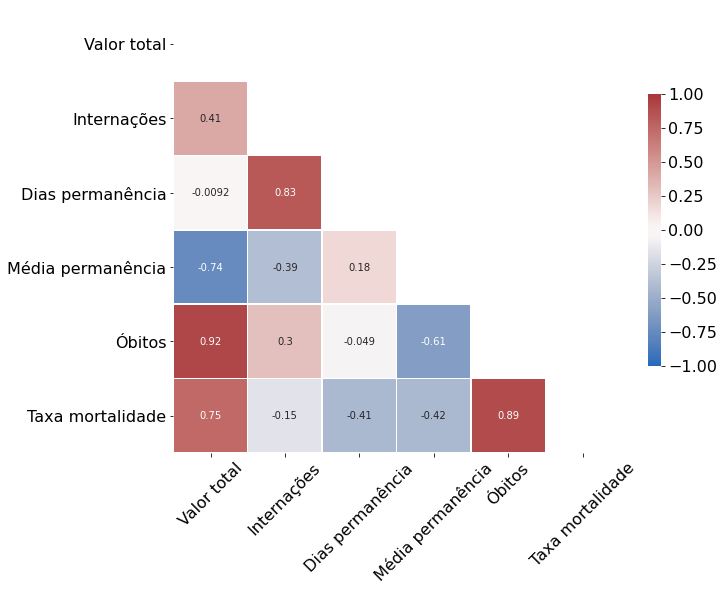

In [12]:
plt.figure(figsize=(10,10))

cmap = sns.color_palette("vlag", as_cmap=True, n_colors=100)

sns.heatmap(corr_vars_hosp, annot=True, mask=mask, cmap=cmap, square=True, linewidths=.5, cbar_kws={'shrink':.5}, vmax=1, vmin=-1)
plt.xticks(rotation=45)

## Variações no tempo

Quero visualizar a dinâmica das variáveis ao longo do tempo.  
Vou usar o **dataframe mensal** para isso.
Primeiro vou fazer a conversão do índice que está em formato de ``str`` para ``datetime``.  
Usei um dicionário para ajeitar as _strings_ e depois usei a biblioteca ``dateutil.parser.parse``.

In [13]:
meses_dict = dict({'Janeiro':'01','Fevereiro':'02','Março':'03','Abril':'04','Maio':'05','Junho':'06',
     'Julho':'07','Agosto':'08','Setembro':'09','Outubro':'10','Novembro':'11','Dezembro':'12'})
meses_dict

{'Abril': '04',
 'Agosto': '08',
 'Dezembro': '12',
 'Fevereiro': '02',
 'Janeiro': '01',
 'Julho': '07',
 'Junho': '06',
 'Maio': '05',
 'Março': '03',
 'Novembro': '11',
 'Outubro': '10',
 'Setembro': '09'}

In [14]:
meses_dict_num2str = dict(enumerate(meses_dict.keys()))
meses_dict_num2str

{0: 'Janeiro',
 1: 'Fevereiro',
 2: 'Março',
 3: 'Abril',
 4: 'Maio',
 5: 'Junho',
 6: 'Julho',
 7: 'Agosto',
 8: 'Setembro',
 9: 'Outubro',
 10: 'Novembro',
 11: 'Dezembro'}

In [15]:
from dateutil.parser import parse
import datetime 
new_index = pd.Series(dados_hospitalares_BR_mensal.index).str[2:-5].replace(meses_dict)+pd.Series(dados_hospitalares_BR_mensal.index).str[-5:]
new_index.apply(lambda x: parse(x,default=datetime.datetime(2015, 1, 1)))
dados_hospitalares_BR_mensal.index = new_index
dados_hospitalares_BR_mensal

,Valor total,Internações,Dias permanência,Média permanência,Óbitos,Taxa mortalidade
Ano/mês processamento,,,,,,
01/2008,4.084249e+08,651615,3516949,5.4,17602,2.70
02/2008,6.131743e+08,824348,4743864,5.8,26148,3.17
03/2008,6.640431e+08,889296,5175568,5.8,28302,3.18
04/2008,6.866629e+08,916303,5252761,5.7,29164,3.18
05/2008,7.158036e+08,944567,5457019,5.8,30173,3.19
...,...,...,...,...,...,...
05/2020,1.194453e+09,782983,4312251,5.5,49890,6.37
06/2020,1.281062e+09,783603,4332230,5.5,53916,6.88
07/2020,1.479130e+09,836867,4666954,5.6,58116,6.94


Aqui vou plotar os valores mensais de algumas variáveis para o período todo do dataset.  

Observamos algumas coisas interessantes
- em relação ao "ano/mês de processamento", vemos um **comportamento aproximadamente periódico das internações, dentro da janela de cada ano**
- parece haver um **pico de internações e óbitos no inverno** em relação ao verão
- o valor médio do tempo médio de permanência tem dois picos, em Julho e em Dezembro.

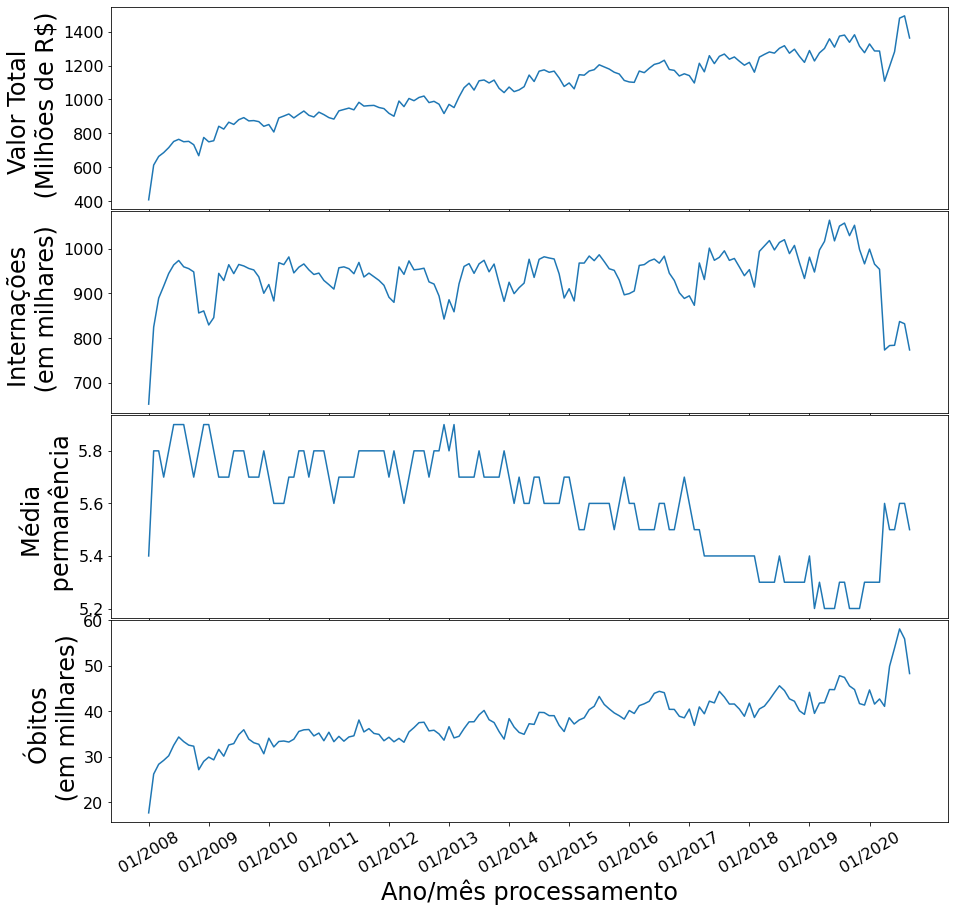

In [16]:
import matplotlib.ticker as ticker

fig, ax = plt.subplots(nrows=4,ncols=1, sharex=True,figsize=(15,15))

sns.lineplot(data=dados_hospitalares_BR_mensal, x=dados_hospitalares_BR_mensal.index, y=dados_hospitalares_BR_mensal['Valor total']/1e6, ax=ax[0])
ax[0].set_ylabel('Valor Total \n (Milhões de R$)')

sns.lineplot(data=dados_hospitalares_BR_mensal, x=dados_hospitalares_BR_mensal.index, y=dados_hospitalares_BR_mensal['Internações']/1e3,ax=ax[1])
ax[1].set_ylabel('Internações \n (em milhares)')

sns.lineplot(data=dados_hospitalares_BR_mensal, x=dados_hospitalares_BR_mensal.index, y='Média permanência',ax=ax[2])
ax[2].set_ylabel('Média \n permanência')

sns.lineplot(data=dados_hospitalares_BR_mensal, x=dados_hospitalares_BR_mensal.index, y=dados_hospitalares_BR_mensal['Óbitos']/1e3,ax=ax[3])
ax[3].set_ylabel('Óbitos \n (em milhares)')

ax[0].xaxis.set_major_locator(ticker.IndexLocator(12, offset=0))
plt.xticks(rotation=30)

fig.subplots_adjust(hspace=.01)
plt.show()

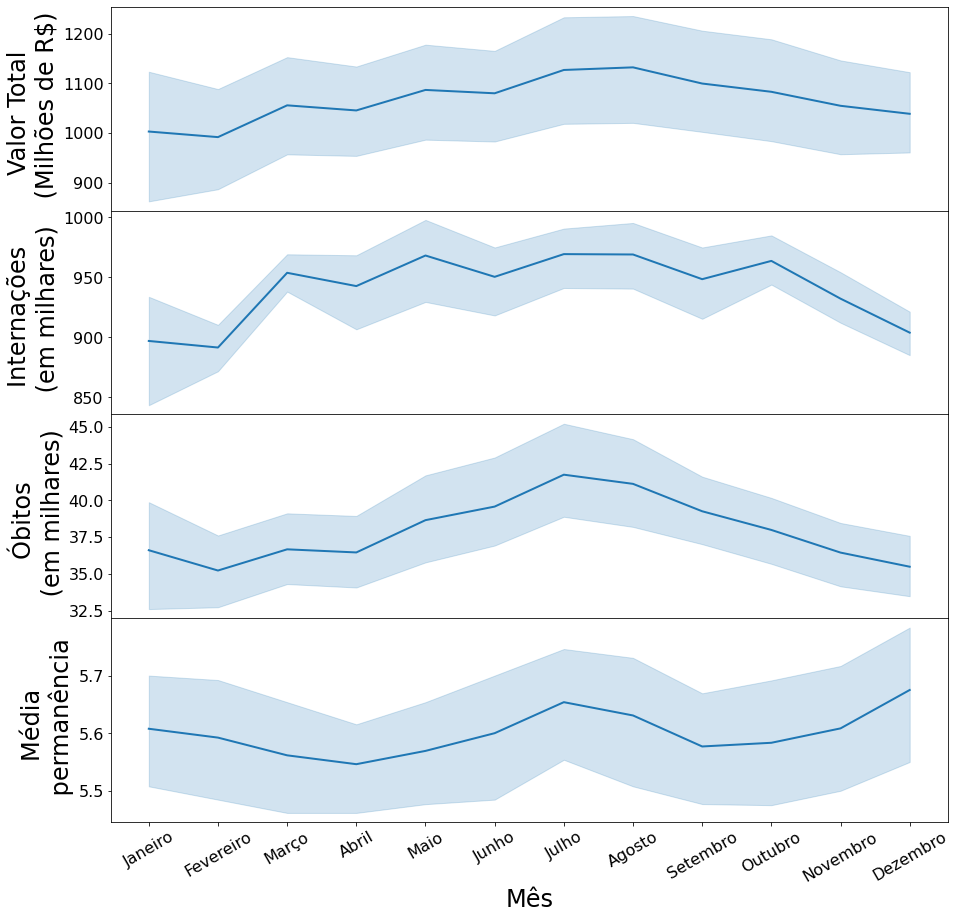

In [17]:
dados_hospitalares_BR_mensal['Ano'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.year.values
dados_hospitalares_BR_mensal['Mês'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.month.values


fig, ax = plt.subplots(nrows=4,ncols=1, sharex=True,figsize=(15,15))

cmap = sns.color_palette("hls", 2)

g1 = sns.lineplot(data=dados_hospitalares_BR_mensal, 
                 x='Mês', y=dados_hospitalares_BR_mensal['Valor total']/1e6, 
                 ax=ax[0], palette=cmap, linewidth=2)
ax[0].set_ylabel('Valor Total \n (Milhões de R$)')

g2 = sns.lineplot(data=dados_hospitalares_BR_mensal, 
                  x='Mês', y=dados_hospitalares_BR_mensal['Internações']/1e3,
                  ax=ax[1], palette=cmap, linewidth=2)
ax[1].set_ylabel('Internações \n (em milhares)')

g3 = sns.lineplot(data=dados_hospitalares_BR_mensal, 
                  x='Mês', y=dados_hospitalares_BR_mensal['Óbitos']/1e3,
                  ax=ax[2], palette=cmap, linewidth=2)
ax[2].set_ylabel('Óbitos \n (em milhares)')

g3 = sns.lineplot(data=dados_hospitalares_BR_mensal, 
                  x='Mês', y='Média permanência',
                  ax=ax[3], palette=cmap, linewidth=2)
ax[3].set_ylabel('Média \n permanência')

ax[0].xaxis.set_major_locator(ticker.IndexLocator(1, offset=0))
ax[0].set_xticklabels(list(meses_dict_num2str.values()))
plt.xticks(rotation=30)


fig.subplots_adjust(hspace=0)
plt.show()

In [18]:
'''dados_hospitalares_BR_mensal['Ano'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.year.values
dados_hospitalares_BR_mensal['Mês'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.month.values


fig, ax = plt.subplots(nrows=2,ncols=1, sharex=True,figsize=(15,15))

cmap = sns.color_palette("hls", 13)

g1 = sns.barplot(data=dados_hospitalares_BR_mensal, x='Ano', y=dados_hospitalares_BR_mensal['Valor total']/1e6, ax=ax[0], hue='Mês', palette=cmap, linewidth=2)
ax[0].set_ylabel('Valor Total \n (Milhões de R$)')
ax[0].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

g2 = sns.barplot(data=dados_hospitalares_BR_mensal, x='Ano', y=dados_hospitalares_BR_mensal['Internações']/1e3,ax=ax[1], hue='Mês', palette=cmap, linewidth=2)
ax[1].set_ylabel('Internações \n (em milhares)')
ax[1].legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

ax[0].xaxis.set_major_locator(ticker.IndexLocator(1, offset=0))
#ax[0].set_xticklabels(list(meses_dict_num2str.values()))
plt.xticks(rotation=30)

leg1 = g1.axes.get_legend()
leg2 = g2.axes.get_legend()

new_labels = list(meses_dict_num2str.values())
for t, l in zip(leg1.texts, new_labels): t.set_text(l)
for t, l in zip(leg2.texts, new_labels): t.set_text(l)
plt.show()'''

'dados_hospitalares_BR_mensal[\'Ano\'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.year.values\ndados_hospitalares_BR_mensal[\'Mês\'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.month.values\n\n\nfig, ax = plt.subplots(nrows=2,ncols=1, sharex=True,figsize=(15,15))\n\ncmap = sns.color_palette("hls", 13)\n\ng1 = sns.barplot(data=dados_hospitalares_BR_mensal, x=\'Ano\', y=dados_hospitalares_BR_mensal[\'Valor total\']/1e6, ax=ax[0], hue=\'Mês\', palette=cmap, linewidth=2)\nax[0].set_ylabel(\'Valor Total \n (Milhões de R$)\')\nax[0].legend(bbox_to_anchor=(1.05, 1.0), loc=\'upper left\')\n\ng2 = sns.barplot(data=dados_hospitalares_BR_mensal, x=\'Ano\', y=dados_hospitalares_BR_mensal[\'Internações\']/1e3,ax=ax[1], hue=\'Mês\', palette=cmap, linewidth=2)\nax[1].set_ylabel(\'Internações \n (em milhares)\')\nax[1].legend(bbox_to_anchor=(1.05, 1.0), loc=\'upper left\')\n\nax[0].xaxis.set_major_locator(ticker.IndexLocator(1, offset=0))\n#ax[0].set_xtic

# Óbitos por Capítulo do CID-10

Aqui vou analisar quais tipos de doenças são as maiores causas de óbito das internações.  
Na Tabela abaixo, mostro como fiz a seleção dos dados desta seção no Tabnet.

Parâmetro | Valor
--- | ---
**Dataset** | "*Estatísticas Vitais:  Mortalidade – 1996 a 2018, pela CID-10*"
**Linha** | "*Ano/mês processamento*"
**Coluna** | "*Capítulo CID-10*"
**Conteúdo** |"*Óbitos p/Ocorrênc*"
**Períodos Disponíveis**| todos os anos e meses da lista (Jan/2011 até Dez 2018)
**Seleções Disponíveis**| não modifiquei

As colunas estão classificadas pelos  "**Capítulos do CID-10**", cuja descrição e código estão disponíveis neste link: http://tabnet.datasus.gov.br/cgi/sih/mxcid10.htm  
Abaixo vou importar a tabela original para facilitar a interpretação das informações que vamos processar.


In [19]:
from io import StringIO

capitulos_CID10 = '''I	Algumas doenças infecciosas e parasitárias	A00-B99
II	Neoplasmas [tumores]	C00-D48
III	Doenças do sangue e dos órgãos hematopoéticos e alguns transtornos imunitários	D50-D89
IV	Doenças endócrinas, nutricionais e metabólicas	E00-E90
V	Transtornos mentais e comportamentais	F00-F99
VI	Doenças do sistema nervoso	G00-G99
VII	Doenças do olho e anexos	H00-H59
VIII	Doenças do ouvido e da apófise mastóide	H60-H95
IX	Doenças do aparelho circulatório	I00-I99
X	Doenças do aparelho respiratório	J00-J99
XI	Doenças do aparelho digestivo	K00-K93
XII	Doenças da pele e do tecido subcutâneo	L00-L99
XIII	Doenças do sistema osteomuscular e do tecido conjuntivo	M00-M99
XIV	Doenças do aparelho geniturinário	N00-N99
XV	Gravidez, parto e puerpério	O00-O99
XVI	Algumas afecções originadas no período perinatal	P00-P96
XVII	Malformações congênitas, deformidades e anomalias cromossômicas	Q00-Q99
XVIII	Sintomas, sinais e achados anormais de exames clínicos e de laboratório, não classificados em outra parte	R00-R99
XIX	Lesões, envenenamentos e algumas outras conseqüências de causas externas	S00-T98
XX	Causas externas de morbidade e de mortalidade	V01-Y98
XXI	Fatores que influenciam o estado de saúde e o contato com os serviços de saúde	Z00-Z99
**	CID 10ª Revisão não disponível ou não preenchido ou inválido	U99, em branco ou inválido
'''
capitulos_CID10_io = StringIO(capitulos_CID10)

df_capitulos_CID10 = pd.read_csv(capitulos_CID10_io,sep='\t',header=None).rename(columns={0:'Capitulo',1:'Descrição',2:'Código'})
df_capitulos_CID10['Capitulo'] = df_capitulos_CID10['Capitulo'].apply(lambda x: 'Cap '+x)
df_capitulos_CID10

,Capitulo,Descrição,Código
0,Cap I,Algumas doenças infecciosas e parasitárias,A00-B99
1,Cap II,Neoplasmas [tumores],C00-D48
2,Cap III,Doenças do sangue e dos órgãos hematopoéticos ...,D50-D89
3,Cap IV,"Doenças endócrinas, nutricionais e metabólicas",E00-E90
4,Cap V,Transtornos mentais e comportamentais,F00-F99
5,Cap VI,Doenças do sistema nervoso,G00-G99
6,Cap VII,Doenças do olho e anexos,H00-H59
7,Cap VIII,Doenças do ouvido e da apófise mastóide,H60-H95
8,Cap IX,Doenças do aparelho circulatório,I00-I99
9,Cap X,Doenças do aparelho respiratório,J00-J99


## Importando os dados

In [20]:
dict_capitulos_CID10 = dict(df_capitulos_CID10[['Capitulo','Descrição']].values.tolist())

In [21]:
df_CID10_caps = pd.read_csv(data_folder+file_2, sep=';', skiprows=3, skipfooter=8, encoding='iso-8859-1')
df_CID10_caps.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Ano/mês do Óbito,Cap I,Cap II,Cap III,Cap IV,Cap V,Cap VI,Cap VII,Cap VIII,Cap IX,Cap X,Cap XI,Cap XII,Cap XIII,Cap XIV,Cap XV,Cap XVI,Cap XVII,Cap XVIII,Cap XX,Total
0,2011,49175,184384,6344,73929,13725,26948,23,150,335213,126693,59707,3395,4488,26317,1680,23579,10543,78363,145842,1170498
1,..Janeiro/2011,4276,15710,510,6352,1264,2351,1,9,28355,11356,5084,262,415,2142,154,2136,837,6958,13804,101976
2,..Fevereiro/2011,3984,14191,509,5711,1118,2059,-,13,24658,9731,4585,246,343,1964,137,1950,818,5807,11121,88945
3,..Março/2011,4316,15618,595,6030,1096,2292,3,10,27306,10063,5081,289,376,2154,158,2180,997,6323,12121,97008
4,..Abril/2011,3970,15169,567,5727,1080,2140,2,6,26194,9963,4904,271,366,2091,127,2072,895,6150,11805,93499


## Filtrando dados Mensais e Anuais

Aqui os anos são de 2011 a 2019, então precisei mudar a lista de anos.

In [22]:
row_years_2 = [str(i) for i in range(2011,2019)]+['Total'] 

Primeiro as séries mensais de cada capítulo usando ``drop``:

In [23]:
obitos_por_cap_CID10_mensal = df_CID10_caps.set_index('Ano/mês do Óbito').drop(row_years_2)
obitos_por_cap_CID10_mensal

,Cap I,Cap II,Cap III,Cap IV,Cap V,Cap VI,Cap VII,Cap VIII,Cap IX,Cap X,Cap XI,Cap XII,Cap XIII,Cap XIV,Cap XV,Cap XVI,Cap XVII,Cap XVIII,Cap XX,Total
Ano/mês do Óbito,,,,,,,,,,,,,,,,,,,,
..Janeiro/2011,4276,15710,510,6352,1264,2351,1,9,28355,11356,5084,262,415,2142,154,2136,837,6958,13804,101976
..Fevereiro/2011,3984,14191,509,5711,1118,2059,-,13,24658,9731,4585,246,343,1964,137,1950,818,5807,11121,88945
..Março/2011,4316,15618,595,6030,1096,2292,3,10,27306,10063,5081,289,376,2154,158,2180,997,6323,12121,97008
..Abril/2011,3970,15169,567,5727,1080,2140,2,6,26194,9963,4904,271,366,2091,127,2072,895,6150,11805,93499
..Maio/2011,4338,15897,548,6368,1148,2224,4,9,28851,10992,5221,298,388,2158,167,2049,903,6799,12281,100643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
..Agosto/2018,4543,19271,565,7479,1176,3699,1,11,32518,14112,5892,561,526,3700,152,1699,966,5996,12302,115169
..Setembro/2018,4284,18827,518,6843,1153,3446,2,9,29928,12792,5490,541,550,3552,152,1547,923,5793,12547,108897
..Outubro/2018,4392,19154,547,6502,1129,3332,1,12,29207,12170,5522,501,525,3649,131,1647,914,5769,12562,107666


Agora as séries anuais de cada capítulo usando ``loc``:

In [24]:
obitos_por_cap_CID10_anual = df_CID10_caps.set_index('Ano/mês do Óbito').loc[row_years_2].T
obitos_por_cap_CID10_anual

Ano/mês do Óbito,2011,2012,2013,2014,2015,2016,2017,2018,Total
Cap I,49175,49608,52058,52174,55022,57188,54874,54679,424778
Cap II,184384,191577,196954,201968,209780,215217,221821,227920,1649621
Cap III,6344,6358,6388,6108,6506,6878,6622,6601,51805
Cap IV,73929,72495,74726,73972,76235,78075,79662,81365,610459
Cap V,13725,12641,13052,12480,12558,12674,12858,13697,103685
Cap VI,26948,28712,30300,32381,34721,36870,38786,41035,269753
Cap VII,23,38,15,18,21,20,19,21,175
Cap VIII,150,139,143,157,147,173,179,169,1257
Cap IX,335213,333295,339672,340284,349642,362091,358882,357770,2776849
Cap X,126693,127204,137832,139045,149541,158041,155620,155191,1149167


## Ordenando óbitos pelo Total de Capítulos

Finalmente vamos **ordenar o número de óbitos de acordo com o Total de óbitos em cada categorai (Capítulos do CID-10)**.

Mas antes, um probleminha: temos uma série, de uma das categorias, que não é numérica, são strings!

In [25]:
# probleminha aqui, na hora de aplicar sort_values, descobri que tem uma linha com formato str no Cap. VII
obitos_por_cap_CID10_anual['Total'].apply(type)

Cap I        <class 'int'>
Cap II       <class 'int'>
Cap III      <class 'int'>
Cap IV       <class 'int'>
Cap V        <class 'int'>
Cap VI       <class 'int'>
Cap VII      <class 'str'>
Cap VIII     <class 'int'>
Cap IX       <class 'int'>
Cap X        <class 'int'>
Cap XI       <class 'int'>
Cap XII      <class 'int'>
Cap XIII     <class 'int'>
Cap XIV      <class 'int'>
Cap XV       <class 'int'>
Cap XVI      <class 'int'>
Cap XVII     <class 'int'>
Cap XVIII    <class 'int'>
Cap XX       <class 'int'>
Total        <class 'int'>
Name: Total, dtype: object

Além de números no formato string, tem uns dados faltando com "-" (provavelmente a causa do problema pra reconhecimento do tipo de dado).  
Portanto vou ter que converter essa série usando algo mais robusto que ``astype``.  
Optei por tratar o dado ausente "-" como $0$.

In [26]:
def convert_str2int_but(x):
  try:
    y = int(x)
  except:
    y = 0
  return y
# just testing 
# pd.concat([obitos_por_cap_CID10_mensal['Cap VII'].apply(convert_str2int_but).T,obitos_por_cap_CID10_mensal['Cap VII'].T],axis=1)

obitos_por_cap_CID10_mensal['Cap VII'] = obitos_por_cap_CID10_mensal['Cap VII'].apply(convert_str2int_but)
obitos_por_cap_CID10_anual.loc['Cap VII']  = obitos_por_cap_CID10_anual.loc['Cap VII'].apply(convert_str2int_but)

Após esse tratamento, podemos usar ``sort_values`` **pra ordenar de maneira decrescente a partir do capítulo com mais óbitos no total ao longo dos anos**.  
Observe que **a ordem em cada ano também é sempre a mesma**.  

In [27]:
obitos_por_cap_CID10_anual_ordenado = obitos_por_cap_CID10_anual.sort_values(by=['Total'], ascending=False).drop("Total")
index_ordenado = obitos_por_cap_CID10_anual_ordenado.index
obitos_por_cap_CID10_anual_ordenado

Ano/mês do Óbito,2011,2012,2013,2014,2015,2016,2017,2018,Total
Cap IX,335213,333295,339672,340284,349642,362091,358882,357770,2776849
Cap II,184384,191577,196954,201968,209780,215217,221821,227920,1649621
Cap XX,145842,152013,151683,156942,152136,155861,158657,150814,1223948
Cap X,126693,127204,137832,139045,149541,158041,155620,155191,1149167
Cap IV,73929,72495,74726,73972,76235,78075,79662,81365,610459
Cap XVIII,78363,74935,71804,71191,71713,75869,71822,70505,586202
Cap XI,59707,60509,61934,62763,64202,66044,66052,67316,508527
Cap I,49175,49608,52058,52174,55022,57188,54874,54679,424778
Cap XIV,26317,27975,29709,32510,36549,39367,40470,43428,276325
Cap VI,26948,28712,30300,32381,34721,36870,38786,41035,269753


Para interpretar melhor, uso a descrição das categorias e a coluna ordenada do "Total" de óbitos de cada uma.  
No top 5 de maiores causas de óbito, temos:
1.   Doenças do aparelho circulatório	
2.   Tumores
3.   Causas externas de morbidade e de mortalidade
4.   **Doenças do aparelho respiratório**
5.   Doenças endócrinas, nutricionais e metabólicas




In [28]:
cap_cids_ordenados_por_obito_total = obitos_por_cap_CID10_anual_ordenado.T.rename(columns=dict_capitulos_CID10).loc["Total"].reset_index()

pd.concat([pd.Series(index_ordenado),cap_cids_ordenados_por_obito_total],axis=1,ignore_index=True).rename(columns={0:'Capitulo',1:'Descrição',2:'Óbitos'})

,Capitulo,Descrição,Óbitos
0,Cap IX,Doenças do aparelho circulatório,2776849
1,Cap II,Neoplasmas [tumores],1649621
2,Cap XX,Causas externas de morbidade e de mortalidade,1223948
3,Cap X,Doenças do aparelho respiratório,1149167
4,Cap IV,"Doenças endócrinas, nutricionais e metabólicas",610459
5,Cap XVIII,"Sintomas, sinais e achados anormais de exames ...",586202
6,Cap XI,Doenças do aparelho digestivo,508527
7,Cap I,Algumas doenças infecciosas e parasitárias,424778
8,Cap XIV,Doenças do aparelho geniturinário,276325
9,Cap VI,Doenças do sistema nervoso,269753


Na próxima seção vou detalhar mais sobre doenças respiratórias.

# Óbitos por doença respiratória (Cáp. X do CID-10) separados por faixa etária

Para explorar melhor as características dos óbitos por doenças respiratórias, consultei novamente o Tabnet com uma nova *query*, **filtrando apenas o capítulo X do CID-10 (Doenças do aparelho respiratório)**.  
Também pedi para **dividir as faixas etárias nas colunas**.

Parâmetro | Valor
--- | ---
**Dataset** | "*Estatísticas Vitais:  Mortalidade – 1996 a 2018, pela CID-10*"
**Linha** | "*Ano/mês processamento*"
**Coluna** | "*Faixa Etária*"
**Conteúdo** |"*Óbitos p/Ocorrênc*"
**Períodos Disponíveis**| todos os anos e meses da lista (Jan/2011 até Dez 2018)
**Seleções Disponíveis**| "*Capítulo CID-10: X*"

## Importando os dados

In [29]:
df_CID_X_idades = pd.read_csv(data_folder+file_3, sep=';', skiprows=4, skipfooter=8, encoding='iso-8859-1')
df_CID_X_idades.tail()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Ano/mês do Óbito,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total
100,..Setembro/2018,108,74,26,17,40,112,191,396,918,1874,3050,5977,9,12792
101,..Outubro/2018,115,83,17,24,41,122,211,382,881,1729,2984,5566,15,12170
102,..Novembro/2018,114,79,21,18,29,98,191,368,810,1653,2636,5370,10,11397
103,..Dezembro/2018,103,76,19,19,36,131,201,358,806,1773,2780,5880,11,12193
104,Total,14584,7830,2462,2480,4500,12550,22169,42092,89308,162898,272743,513950,1601,1149167


## Filtrando dados mensais e anuais

Organizando os dados mensais:

In [30]:
obito_cid10_cap_X_faixa_etaria_mensal = df_CID_X_idades.set_index('Ano/mês do Óbito').drop(row_years_2)
obito_cid10_cap_X_faixa_etaria_mensal

,Menor 1 ano,1 a 4 anos,5 a 9 anos,10 a 14 anos,15 a 19 anos,20 a 29 anos,30 a 39 anos,40 a 49 anos,50 a 59 anos,60 a 69 anos,70 a 79 anos,80 anos e mais,Idade ignorada,Total
Ano/mês do Óbito,,,,,,,,,,,,,,
..Janeiro/2011,117,77,21,35,54,133,242,471,916,1503,2815,4949,23,11356
..Fevereiro/2011,121,66,21,29,47,115,232,395,740,1282,2442,4213,28,9731
..Março/2011,181,101,28,34,44,135,226,417,822,1397,2396,4268,14,10063
..Abril/2011,248,125,36,19,35,145,223,393,792,1374,2453,4105,15,9963
..Maio/2011,260,105,37,28,68,126,227,432,914,1549,2635,4584,27,10992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
..Agosto/2018,135,66,25,23,32,135,224,458,976,2016,3362,6645,15,14112
..Setembro/2018,108,74,26,17,40,112,191,396,918,1874,3050,5977,9,12792
..Outubro/2018,115,83,17,24,41,122,211,382,881,1729,2984,5566,15,12170


Organizando os dados anuais:

In [31]:
obito_cid10_cap_X_faixa_etaria_anual = df_CID_X_idades.set_index('Ano/mês do Óbito').loc[row_years_2].T
obito_cid10_cap_X_faixa_etaria_anual

Ano/mês do Óbito,2011,2012,2013,2014,2015,2016,2017,2018,Total
Menor 1 ano,2107,2012,2172,1909,1678,1645,1477,1584,14584
1 a 4 anos,1060,1053,996,960,857,1044,872,988,7830
5 a 9 anos,367,317,341,300,265,308,275,289,2462
10 a 14 anos,359,346,337,306,264,339,265,264,2480
15 a 19 anos,555,564,626,562,551,592,543,507,4500
20 a 29 anos,1564,1610,1628,1586,1595,1622,1412,1533,12550
30 a 39 anos,2658,2826,2964,2709,2710,3060,2636,2606,22169
40 a 49 anos,5130,5161,5748,5080,5175,5959,4732,5107,42092
50 a 59 anos,10343,10378,11233,11044,11222,12923,10858,11307,89308
60 a 69 anos,17730,17853,19441,19240,20926,23044,22105,22559,162898


## Ordenando por faixa etária

Aqui **ordenamos de maneira decrescente os óbitos de cada faixa etária pela soma total ao longo dos anos**.  

As conclusões são bastante simples:
- há uma **relação forte dos óbitos por doenças respiratórias com a idade das pessoas a partir dos 30 anos**
- há uma **quantidade alta de óbitos de bebês com menos de 1 ano** em comparação com adolescentes e outras crianças. 

In [32]:
obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade = obito_cid10_cap_X_faixa_etaria_anual.drop(['Total']).sort_values(by=['Total'], ascending=False)
obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade

Ano/mês do Óbito,2011,2012,2013,2014,2015,2016,2017,2018,Total
80 anos e mais,53703,54203,59378,61938,68673,70337,73860,71858,513950
70 a 79 anos,30874,30659,32746,33216,35417,36969,36404,36458,272743
60 a 69 anos,17730,17853,19441,19240,20926,23044,22105,22559,162898
50 a 59 anos,10343,10378,11233,11044,11222,12923,10858,11307,89308
40 a 49 anos,5130,5161,5748,5080,5175,5959,4732,5107,42092
30 a 39 anos,2658,2826,2964,2709,2710,3060,2636,2606,22169
Menor 1 ano,2107,2012,2172,1909,1678,1645,1477,1584,14584
20 a 29 anos,1564,1610,1628,1586,1595,1622,1412,1533,12550
1 a 4 anos,1060,1053,996,960,857,1044,872,988,7830
15 a 19 anos,555,564,626,562,551,592,543,507,4500


## Sazonalidade

Em relação aos anos com mais óbitos, **2016 foi ano com maior número de casos**, embora haja uma tendência ao longo dos anos. Essa tendência pode ter sido por causa do aumento do número de atendimentos ou do número de registros.

In [33]:
obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total = obito_cid10_cap_X_faixa_etaria_anual.loc['Total'].drop(['Total']).sort_values(ascending=False)
obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total = pd.DataFrame(obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total)
obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total

,Total
Ano/mês do Óbito,
2016,158041
2017,155620
2018,155191
2015,149541
2014,139045
2013,137832
2012,127204
2011,126693


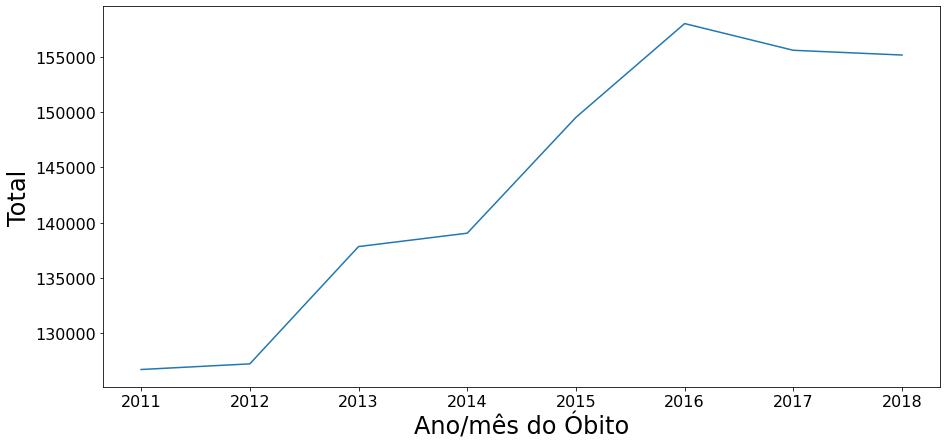

In [34]:
plt.figure(figsize=(15,7))
sns.lineplot(data=pd.DataFrame(obito_cid10_cap_X_faixa_etaria_anual.loc['Total'].drop(['Total'])),y='Total', x='Ano/mês do Óbito')

Agora vamos analisar a sazonalidade por mês:

In [35]:
obito_cid10_cap_X_faixa_etaria_mensal_total = pd.DataFrame(obito_cid10_cap_X_faixa_etaria_mensal['Total'])

new_index = pd.Series(obito_cid10_cap_X_faixa_etaria_mensal_total.index).str[2:-5].replace(meses_dict)+pd.Series(obito_cid10_cap_X_faixa_etaria_mensal_total.index).str[-5:]
new_index.apply(lambda x: parse(x,default=datetime.datetime(2015, 1, 1)))
obito_cid10_cap_X_faixa_etaria_mensal_total.index = new_index
obito_cid10_cap_X_faixa_etaria_mensal_total["Mês"] =  pd.Series(pd.to_datetime(obito_cid10_cap_X_faixa_etaria_mensal_total.index)).dt.month.values
obito_cid10_cap_X_faixa_etaria_mensal_total

,Total,Mês
Ano/mês do Óbito,,
01/2011,11356,1
02/2011,9731,2
03/2011,10063,3
04/2011,9963,4
05/2011,10992,5
...,...,...
08/2018,14112,8
09/2018,12792,9
10/2018,12170,10


Plotando o *dataframe* com repetição dos meses ao longo das linhas, podemos ver a média e o intervalo de confiança.  
**Aqui fica muito clara a sazonalidade de óbitos causados por doenças respiratórias: há um pico bastante destacado em Julho**, e uma tendência de queda na direção do verão!

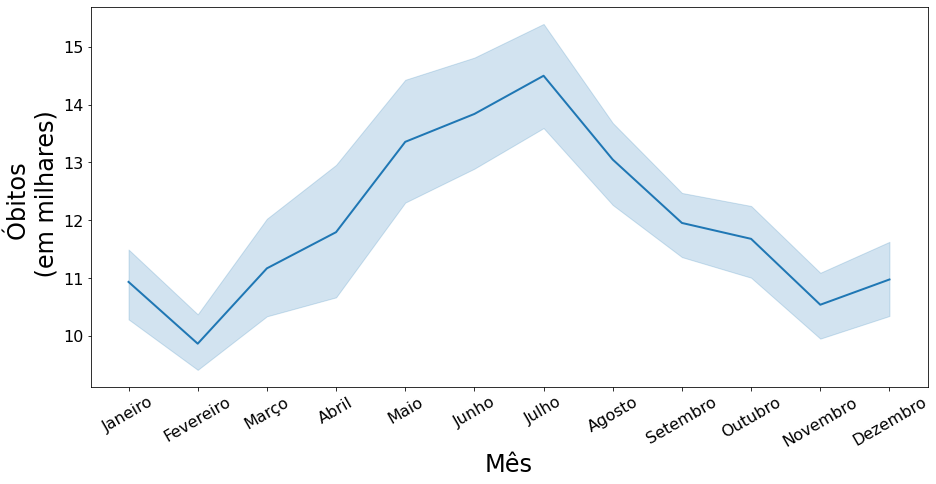

In [36]:
dados_hospitalares_BR_mensal['Ano'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.year.values
dados_hospitalares_BR_mensal['Mês'] = pd.Series(pd.to_datetime(dados_hospitalares_BR_mensal.index)).dt.month.values


fig, ax = plt.subplots(nrows=1,ncols=1, sharex=True,figsize=(15,7))

g1 = sns.lineplot(data=obito_cid10_cap_X_faixa_etaria_mensal_total, 
                  x='Mês', y=obito_cid10_cap_X_faixa_etaria_mensal_total['Total']/1e3, 
                  ax=ax, linewidth=2)
ax.set_ylabel('Óbitos \n (em milhares)')

ax.xaxis.set_major_locator(ticker.IndexLocator(1, offset=0))
ax.set_xticklabels(list(meses_dict_num2str.values()))
plt.xticks(rotation=30)

plt.show()

## Relativo ao total de óbitos de cada ano

Do primeiro dataset, vou extrair o total de óbitos de cada um dos anos de interesse existentes nos datasets de óbitos por capítulos do CID-10.

In [37]:
total_obitos_ordenado_idx_serie_cid10_ordenada = dados_hospitalares_BR_anual.loc['Óbitos',obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total.index.tolist()]
total_obitos_ordenado_idx_serie_cid10_ordenada

Ano/mês processamento
2016    495250
2017    491691
2018    502992
2015    475839
2014    449233
2013    440954
2012    421575
2011    418505
Name: Óbitos, dtype: object

Agora vou calcular a relação entre a soma dos óbitos por doença respiratória em cada ano em relação ao total de óbitos no ano. O resultado parece consistente entre 2011 e 2018: aproximadamente $30\%$ até $32\%$ do total de óbitos anuais são resultados de óbitos por doença respiratória.

In [38]:
obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total['Relativo'] = 100*obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total['Total']/total_obitos_ordenado_idx_serie_cid10_ordenada
obito_cid10_cap_X_faixa_etaria_anual_ordenado_anos_total

,Total,Relativo
Ano/mês do Óbito,,
2016,158041,31.9114
2017,155620,31.65
2018,155191,30.8536
2015,149541,31.4268
2014,139045,30.9516
2013,137832,31.2577
2012,127204,30.1735
2011,126693,30.2728


Desses óbitos, **metade é na faixa etária de pessoas com mais de $80$ anos**!

In [39]:
obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade_relativo_total = pd.DataFrame()
for ano in row_years_2[:-1]:
  temp = 100*obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade[ano]/dados_hospitalares_BR_anual.loc['Óbitos',ano]
  obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade_relativo_total = pd.concat([obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade_relativo_total, temp],axis=1)
obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade_relativo_total

,2011,2012,2013,2014,2015,2016,2017,2018
80 anos e mais,12.832105,12.857261,13.465804,13.787500,14.431982,14.202322,15.021629,14.286112
70 a 79 anos,7.377212,7.272490,7.426171,7.393936,7.443064,7.464715,7.403837,7.248227
60 a 69 anos,4.236509,4.234834,4.408850,4.282855,4.397706,4.653004,4.495710,4.484962
50 a 59 anos,2.471416,2.461721,2.547431,2.458412,2.358361,2.609389,2.208297,2.247948
40 a 49 anos,1.225792,1.224219,1.303537,1.130816,1.087553,1.203231,0.962393,1.015324
30 a 39 anos,0.635118,0.670343,0.672179,0.603028,0.569520,0.617870,0.536109,0.518100
Menor 1 ano,0.503459,0.477258,0.492568,0.424947,0.352640,0.332155,0.300392,0.314916
20 a 29 anos,0.373711,0.381901,0.369200,0.353046,0.335197,0.327511,0.287172,0.304776
1 a 4 anos,0.253283,0.249778,0.225874,0.213698,0.180103,0.210803,0.177347,0.196425
15 a 19 anos,0.132615,0.133784,0.141965,0.125102,0.115795,0.119536,0.110435,0.100797


In [40]:
obito_cid10_cap_X_faixa_etaria_anual_ordenado_idade_relativo_total.mean(axis=1)

80 anos e mais    13.860589
70 a 79 anos       7.378706
60 a 69 anos       4.399304
50 a 59 anos       2.420372
40 a 49 anos       1.144108
30 a 39 anos       0.602783
Menor 1 ano        0.399792
20 a 29 anos       0.341564
1 a 4 anos         0.213414
15 a 19 anos       0.122504
10 a 14 anos       0.067839
5 a 9 anos         0.067283
Idade ignorada     0.043903
dtype: float64

In [41]:
new_x = dict({'80 anos e mais':">80", '70 a 79 anos':'70-78', 
      '60 a 69 anos':'60-69', 
      '50 a 59 anos':'50-59',
       '40 a 49 anos':'49-49', 
      '30 a 39 anos':'30-39', 
      'Menor 1 ano':'<1', 
      '20 a 29 anos':'20-29',
       '1 a 4 anos':'1-4',
       '15 a 19 anos':'15-19', 
      '10 a 14 anos':'10-14', 
      '5 a 9 anos':'5-9',
       'Idade ignorada':'-'})

In [42]:
df_melt = pd.DataFrame(100*obito_cid10_cap_X_faixa_etaria_anual.drop('Total').drop('Total',axis=1)/dados_hospitalares_BR_anual.loc['Óbitos',row_years_2[:-1]]).reset_index().melt(id_vars=['index'])
df_melt['index'] = df_melt['index'].replace(new_x)
df_melt

,index,Ano/mês do Óbito,value
0,<1,2011,0.503459
1,1-4,2011,0.253283
2,5-9,2011,0.0876931
3,10-14,2011,0.0857815
4,15-19,2011,0.132615
...,...,...,...
99,50-59,2018,2.24795
100,60-69,2018,4.48496
101,70-78,2018,7.24823
102,>80,2018,14.2861


Text(0.5, 0, 'Faixa Etária')

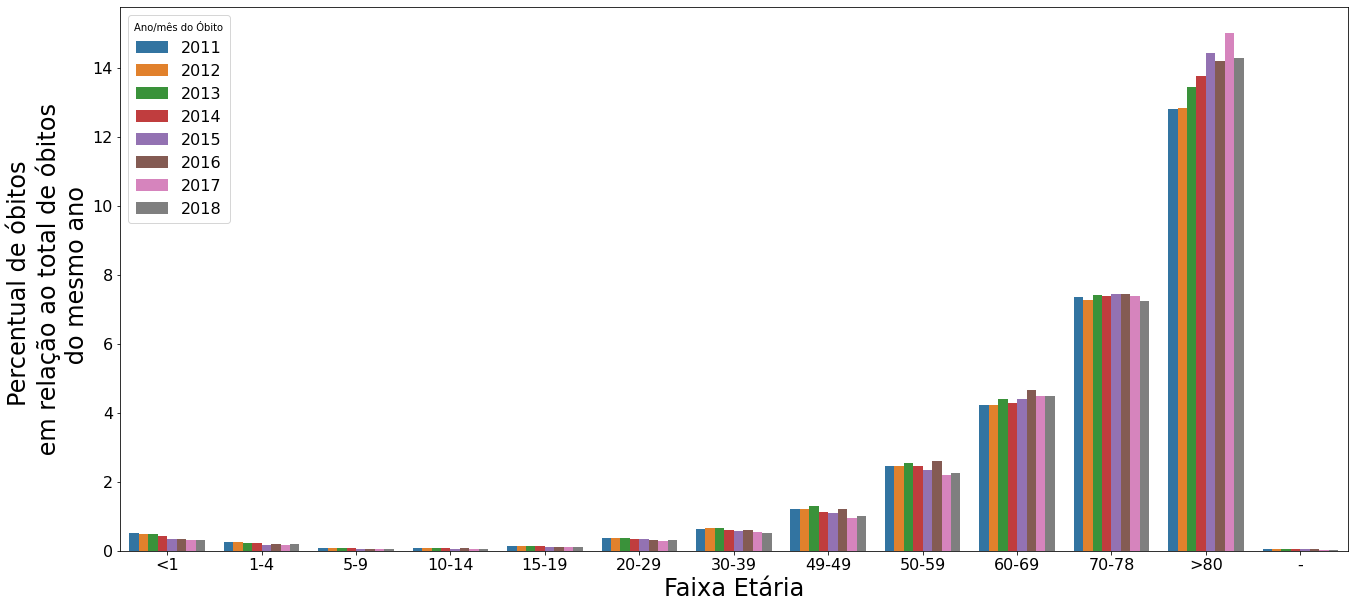

In [47]:
plt.figure(figsize=(22,10))

sns.barplot(data=df_melt, x='index', y='value', hue='Ano/mês do Óbito')
plt.ylabel('Percentual de óbitos \n em relação ao total de óbitos \n do mesmo ano')
plt.xlabel('Faixa Etária')